In [1]:
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 66.2 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

device = "cuda"

# 파이프라인 불러오기
repo_id = "stabilityai/stable-diffusion-2-base"
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
prompt = str(input('prompt:'))  # 프롬프트를 영어로 입력해보세요

prompt:A photo of a Korean man in his 30s who is experiencing AI for the first time being surprised by an AI robot 


  0%|          | 0/25 [00:00<?, ?it/s]

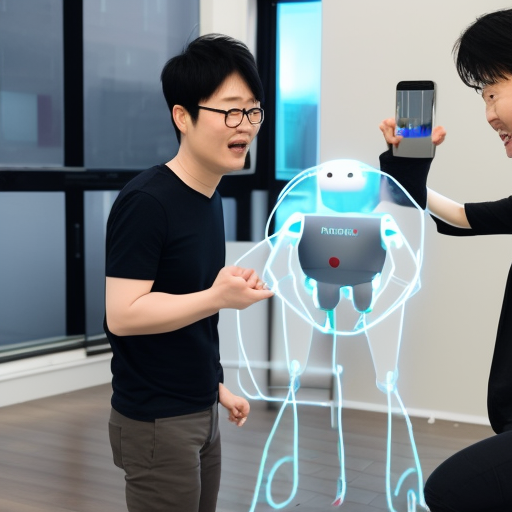

In [5]:
# Google Colab에 맞게 이미지 저장 폴더 생성
import os

# 작업 디렉토리 설정
save_dir = "/content/diffusers"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # 폴더가 없으면 생성

# 입력한 프롬프트를 사용하여 이미지 생성
# `pipe`는 이미 정의된 모델로 가정
image = pipe(prompt, num_inference_steps=25).images[0]

# 이미지 저장
image_path = os.path.join(save_dir, "image.png")
image.save(image_path)

# 이미지 출력
from IPython.display import Image, display
display(Image(image_path))


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating the image...


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at /content/diffusers/generated_image.png


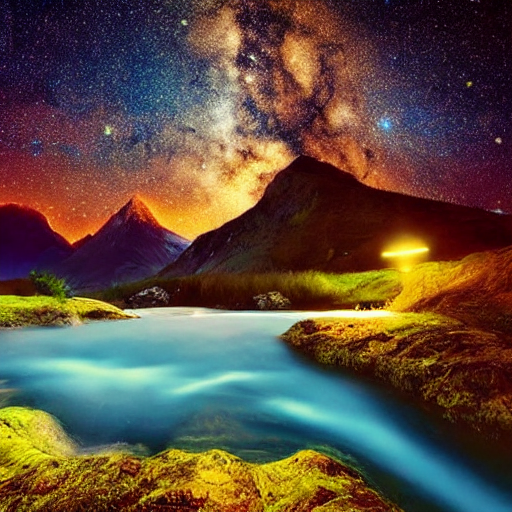

In [6]:
from diffusers import StableDiffusionPipeline
import torch
import os
from IPython.display import Image, display

# Initialize the pipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Define the output directory
output_dir = "/content/diffusers"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Parameters for diffusion
prompt = "A fantasy landscape with mountains and a glowing river under a starry sky"
height = 512  # Image height in pixels (must be a multiple of 8)
width = 512   # Image width in pixels (must be a multiple of 8)
num_inference_steps = 50  # Higher values produce better quality but take more time
guidance_scale = 7.5  # Controls adherence to the prompt

# Generate the image
print("Generating the image...")
image = pipe(
    prompt=prompt,
    height=height,
    width=width,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
).images[0]

# Save the image
image_path = os.path.join(output_dir, "generated_image.png")
image.save(image_path)
print(f"Image saved at {image_path}")

# Display the image
display(Image(image_path))


In [8]:
# 파이썬 이미지 처리 라이브러리 pillow 불러오기
from PIL import Image

# 틀 만들기
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box = (i%cols * w, i // cols * h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

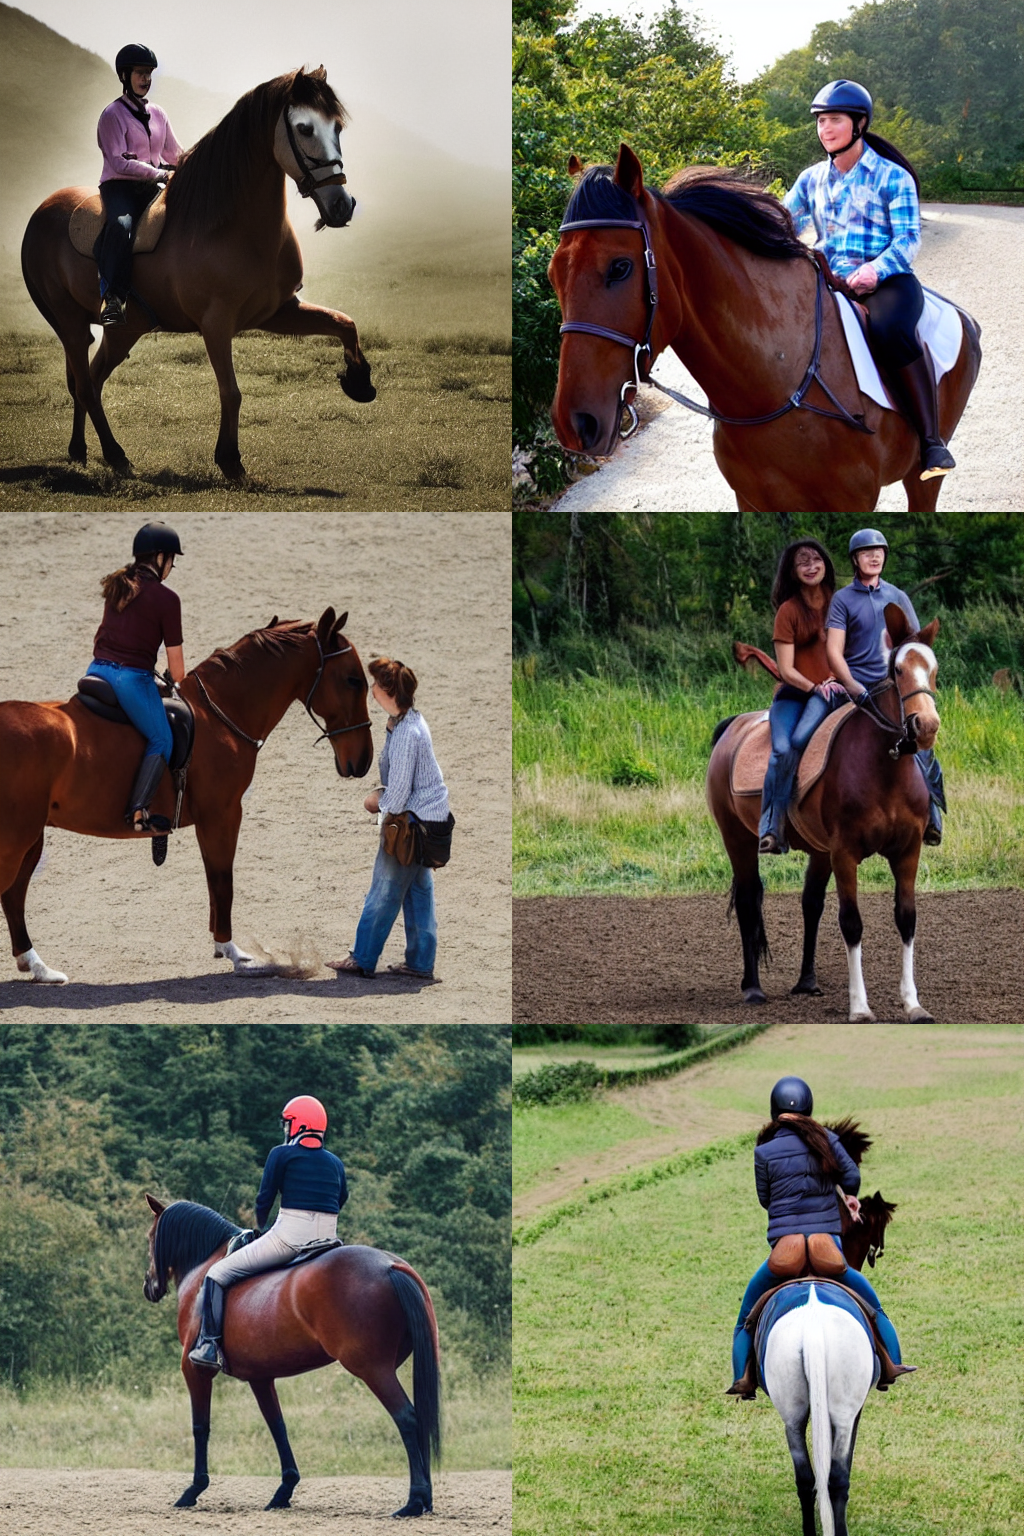

In [9]:
# 이미지의 개수
num_images = 6

# 프롬프트 입력
prompt = ['a horse riding a person'] * num_images

# 이미지 생성
images = pipe(prompt).images

# 이미지 출력
grid = image_grid(images, rows= 3, cols= 2)
grid

In [10]:
# Image-to-Image Generation 파이프라인 불러오기
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

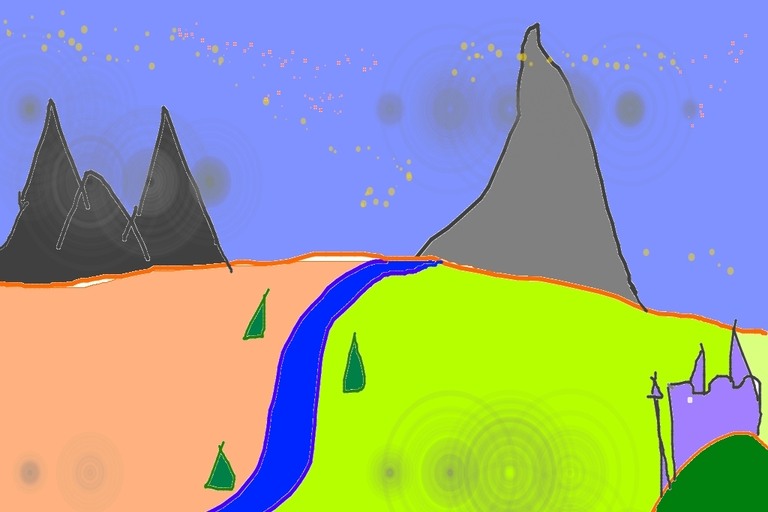

In [14]:
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# url 호출하기
response = requests.get(url)

# 이미지 열기
init_img = Image.open(BytesIO(response.content)).convert("RGB")  # 이미지를 메모리로 읽어와서 RGB로 변경합니다.
init_img = init_img.resize((768, 512))  # 이미지의 크기를 조절합니다.
init_img

In [15]:
# 사용 안할 코드
# init_img = Image.open("/content/diffusers/image.png", mode = 'r')
# init_img = init_img.resize((768, 512))
# init_img

In [16]:
prompt = "A fantasy landscape, trending on artstation"

  0%|          | 0/37 [00:00<?, ?it/s]

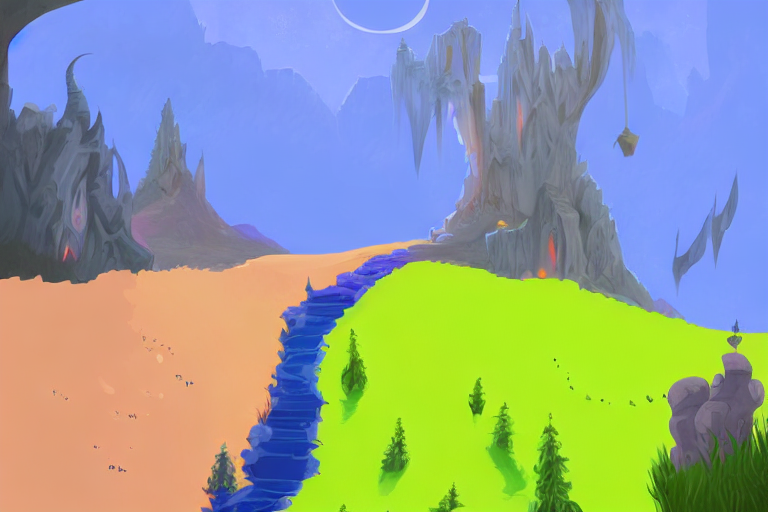

In [17]:
generator = torch.Generator(device=device).manual_seed(1024)   # 모델을 사용할 때마다 동일한 이미지를 생성하기 위해 seed를 설정합니다.

images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5).images
images[0].save("/content/diffusers/fantasy_landscape.png")
images[0]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 2 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/45 [00:00<?, ?it/s]

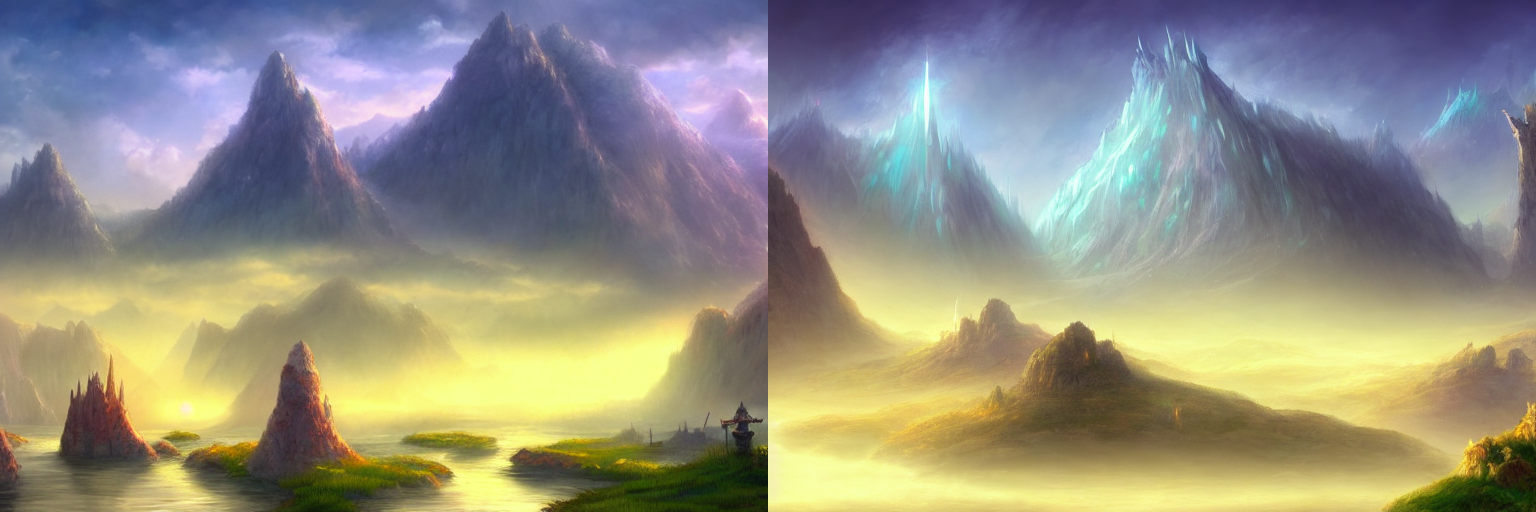

In [18]:
num_images = 2

# 프롬프트 입력
prompt = ['A fantasy landscape, trending on artstation'] * num_images

# 이미지 생성
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.9, guidance_scale=13.5, num_inference_steps=50, generator=generator).images
images

# 이미지 출력
grid = image_grid(images, rows=1, cols=2)
grid

In [19]:
# 다양한 이미지를 생성해 보세요.
# [[YOUR CODE]]